In [1]:
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from sklearn import metrics

In [2]:
df=pd.read_csv("E:/pro_cs244/crime_data.csv")

In [3]:
# Preprocessing
# Remove NaN Value (As Dataset is huge, the NaN row could be neglectable)  
df = df.dropna()

# # As the dataset is too huge is size, we would just subsampled a dataset for modelling as proof of concept
# df = df.sample(n=100000)


# Remove irrelevant/not meaningfull attributes
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782926 entries, 0 to 794445
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  782926 non-null  object 
 1   Block                 782926 non-null  object 
 2   IUCR                  782926 non-null  object 
 3   Primary Type          782926 non-null  object 
 4   Description           782926 non-null  object 
 5   Location Description  782926 non-null  object 
 6   Arrest                782926 non-null  bool   
 7   Domestic              782926 non-null  bool   
 8   Beat                  782926 non-null  int64  
 9   District              782926 non-null  float64
 10  Ward                  782926 non-null  float64
 11  Community Area        782926 non-null  float64
 12  FBI Code              782926 non-null  object 
 13  X Coordinate          782926 non-null  float64
 14  Y Coordinate          782926 non-null  float64
 15  

In [4]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
df['date2'] = pd.to_datetime(df['Date'])
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day
df['Hour'] = df['date2'].dt.hour
df['Minute'] = df['date2'].dt.minute
df['Second'] = df['date2'].dt.second 
df = df.drop(['Date'], axis=1) 
df = df.drop(['date2'], axis=1) 
df = df.drop(['Updated On'], axis=1)
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
0,039XX W CHICAGO AVE,031A,ROBBERY,ARMED: HANDGUN,CONVENIENCE STORE,False,False,1112,11.0,37.0,...,1905056.0,2017,41.895384,-87.724470,"(41.895383921, -87.724469836)",2,17,12,20,0
3,086XX S HALSTED ST,0261,CRIM SEXUAL ASSAULT,AGGRAVATED: HANDGUN,STREET,True,False,622,6.0,21.0,...,1847789.0,2017,41.737771,-87.643664,"(41.737770715, -87.643664418)",10,14,7,20,0
8,062XX S WHIPPLE ST,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,823,8.0,16.0,...,1863026.0,2017,41.779907,-87.699510,"(41.779907312, -87.699510196)",1,1,0,0,0
10,023XX S ALBANY AVE,0325,ROBBERY,VEHICULAR HIJACKING,STREET,False,False,1033,10.0,12.0,...,1888349.0,2017,41.849418,-87.702730,"(41.849418392, -87.702729725)",4,23,18,30,0
19,073XX S KENWOOD AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,324,3.0,8.0,...,1856599.0,2017,41.761627,-87.592095,"(41.761626906, -87.592094503)",3,3,13,45,0


In [5]:
# Convert Categorical Attributes to Numerical
df['Block'] = pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Location'] = pd.factorize(df["Location"])[0] 

In [6]:
df.tail()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
794441,1670,4,HOMICIDE,4,1,False,False,623,6.0,6.0,...,1852817.0,2019,41.751453,-87.624568,5840,5,20,18,7,0
794442,11925,4,HOMICIDE,4,109,False,False,832,8.0,17.0,...,1858532.0,2019,41.767505,-87.686989,96169,5,23,1,0,0
794443,21208,4,HOMICIDE,4,114,False,False,713,7.0,16.0,...,1864312.0,2019,41.783199,-87.657851,90908,5,24,2,12,0
794444,13927,4,HOMICIDE,4,118,False,False,513,5.0,34.0,...,1832344.0,2019,41.695280,-87.626419,185347,5,25,19,1,0
794445,2366,4,HOMICIDE,4,1,False,False,621,6.0,17.0,...,1853877.0,2019,41.754424,-87.634786,6621,5,25,23,43,0


In [7]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


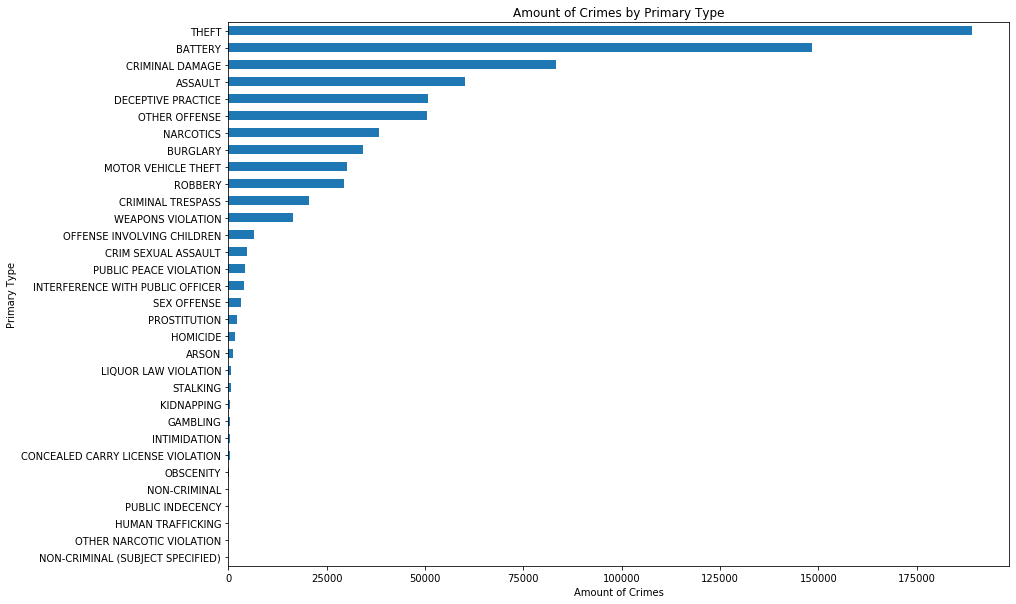

In [8]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [9]:
# At previous plot, we could see that the classes is quite imbalance
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
0,ARSON,1189
15,LIQUOR LAW VIOLATION,686
29,STALKING,604
14,KIDNAPPING,535
9,GAMBLING,534
13,INTIMIDATION,480
4,CONCEALED CARRY LICENSE VIOLATION,434
20,OBSCENITY,220
18,NON-CRIMINAL,75
25,PUBLIC INDECENCY,34


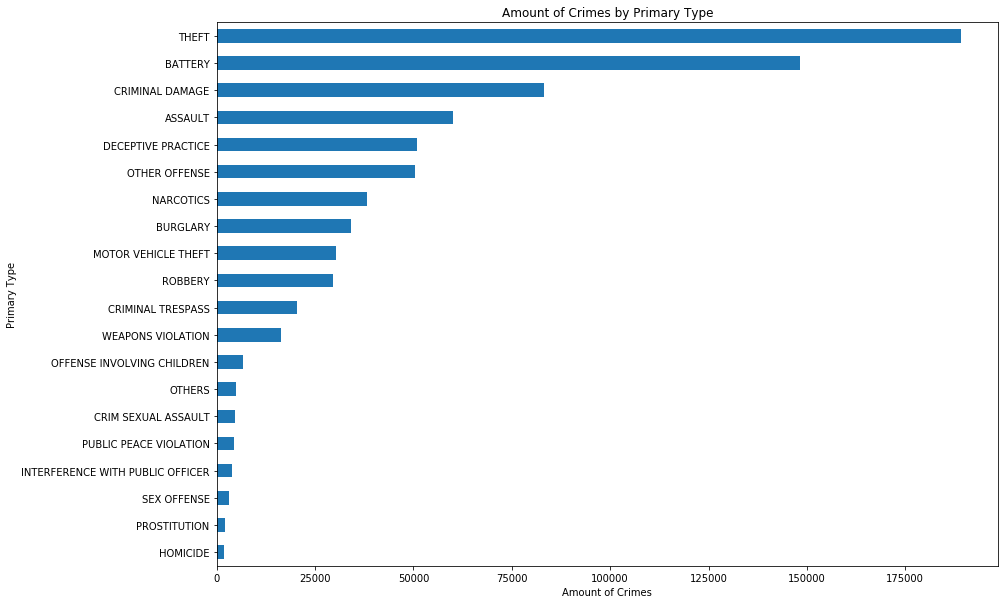

In [10]:
# After that, we replaced it with label 'OTHERS'
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [11]:
# Now we are left with 14 Class as our predictive class
Classes = df['Primary Type'].unique()
Classes

array(['ROBBERY', 'CRIM SEXUAL ASSAULT', 'OFFENSE INVOLVING CHILDREN',
       'HOMICIDE', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'BATTERY', 'OTHERS',
       'SEX OFFENSE', 'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'ASSAULT',
       'WEAPONS VIOLATION', 'OTHER OFFENSE', 'NARCOTICS', 'THEFT',
       'INTERFERENCE WITH PUBLIC OFFICER', 'CRIMINAL TRESPASS',
       'PUBLIC PEACE VIOLATION', 'PROSTITUTION'], dtype=object)

In [12]:
#Encode target labels into categorical variables:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

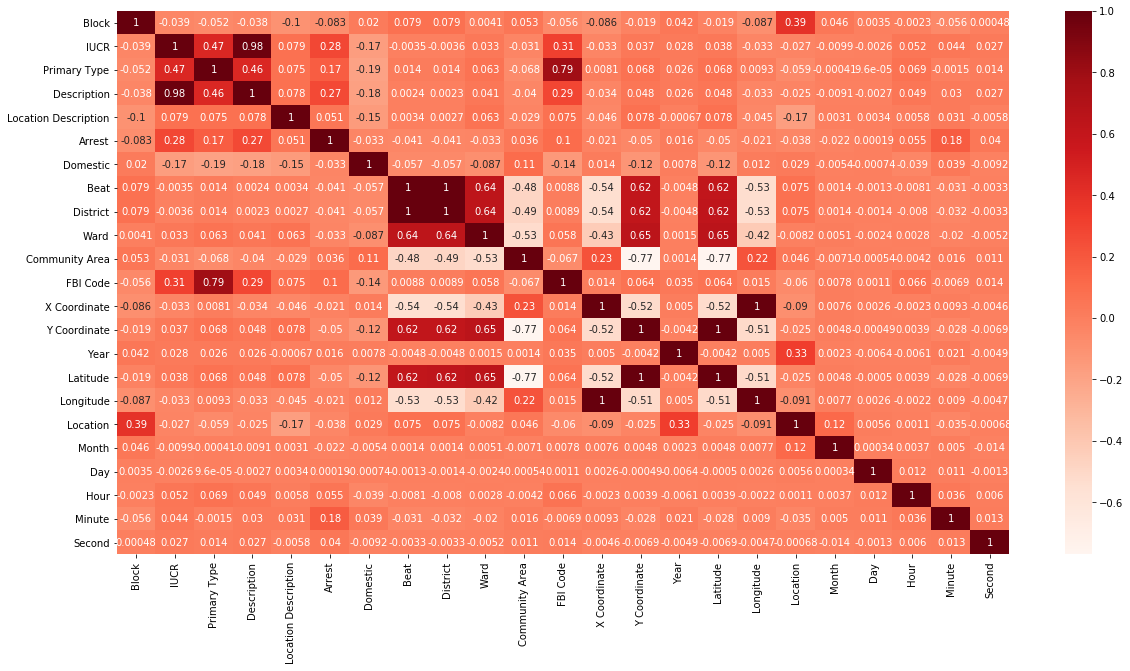

In [13]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.466956
Primary Type    1.000000
Description     0.461366
FBI Code        0.787361
Name: Primary Type, dtype: float64

In [15]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ["IUCR", "Description", "FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code']


In [16]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code']
Target Class        :  Primary Type
Training Set Size   :  (626340, 23)
Test Set Size       :  (156586, 23)


In [17]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=700, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [18]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.9992464204973625
Recall      :  0.9992464204973625
Precision   :  0.9992506899610476
F1 Score    :  0.9992464204973625
Confusion Matrix: 
[[ 5922     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0   915     0     0     0     0     0     0    19     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0  1381     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     6     0     3]
 [    0     0     0   375     0     0     7     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0  6882     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0  6129     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0 29678     0  

In [19]:
import xgboost
classifier=xgboost.XGBClassifier()

In [20]:
classifier.fit(X=x1,y=x2)
prediction_xg = classifier.predict(y[Features])
print(confusion_matrix(y2,prediction_xg))
print(classification_report(y2,prediction_xg))

[[ 5922     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0   934     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0  1384     0     0     0     0     6     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0   382     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0  6882     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0  6129     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0 29678     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0   878     6     0     0     0
      1    73     0     0     0     0     0     0]
